In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [54]:
def sigmoid(x):
    return np.divide(1,1+np.exp(-x))    

In [6]:
def rnn_cell_forward(xt,a_prev,parameters):
    Waa=parameters["Waa"]
    Wax=parameters["Wax"]
    Wya=parameters["Wya"]
    ba=parameters["ba"]
    by=parameters["by"]
    a_next=np.tanh(np.dot(Waa,a_prev)+np.dot(Wax,xt)+ba)
    yt_pred=softmax(np.dot(Wya,a_next)+by)
    cache=(a_next,a_prev,xt,parameters)
    return a_next,yt_pred,cache

In [20]:
def rnn_forward(x,a0,parameters):
    caches=[]
    n_x,m,T_x=x.shape
    n_y,n_a=parameters["Wya"].shape
    a=np.zeros((n_a,m,T_x))
    y_pred=np.zeros((n_y,m,T_x))
    a_next=a0
    for t in range(T_x):
        xt=x[:,:,t]
        a_next,yt_pred,cache=rnn_cell_forward(xt,a_next,parameters)
        a[:,:,t]=a_next
        y_pred[:,:,t]=yt_pred
        caches.append(cache)
    caches=(caches,x)
    return a,y_pred,caches

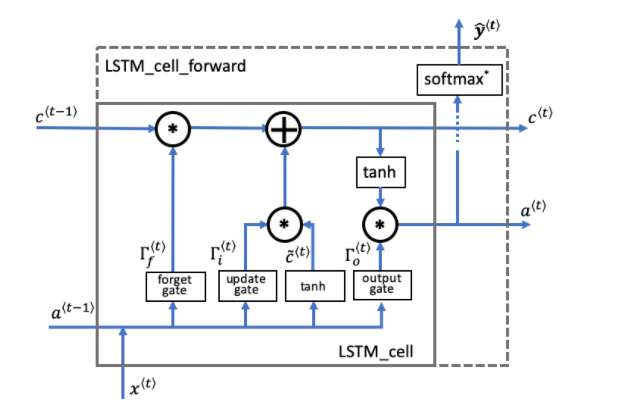

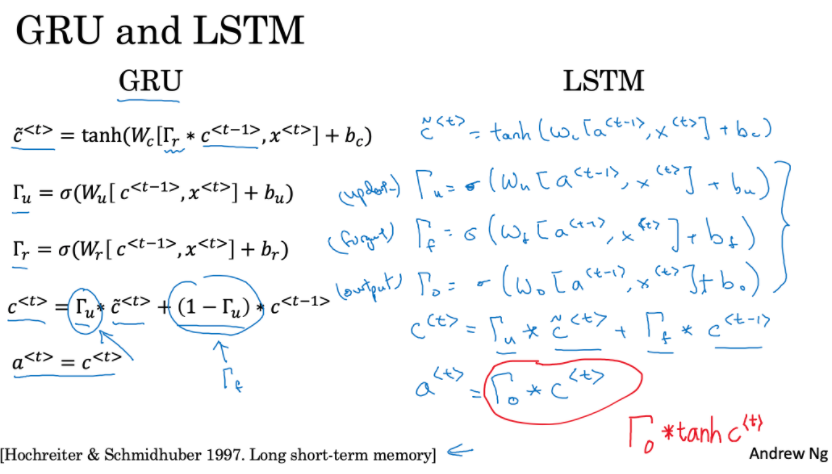

In [60]:
def lstm_cell_forward(xt,a_prev,c_prev,parameters):
    Wf=parameters["Wf"]
    bf=parameters["bf"]
    Wi=parameters["Wi"]
    bi=parameters["bi"]
    Wo=parameters["Wo"]
    bo=parameters["bo"]
    Wc=parameters["Wc"]
    bc=parameters["bc"]
    Wy=parameters["Wy"]
    by=parameters["by"]
    concat=np.concatenate((a_prev,xt),axis=0)
    cct=np.tanh(np.dot(Wc,concat)+bc)
    ft=sigmoid(np.dot(Wf,concat)+bf)
    it=sigmoid(np.dot(Wi,concat)+bi)
    ot=sigmoid(np.dot(Wo,concat)+bo)
    c_next=ft*c_prev+it*cct
    a_next=ot*np.tanh(c_next)
    yt_pred=softmax(np.dot(Wy,a_next)+by)
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)

    return a_next, c_next, yt_pred, cache


In [82]:
def lstm_forward(x,a0,parameters):
    caches=[]
    Wy=parameters["Wy"]
    n_x,m,T_x=x.shape
    n_y,n_a=parameters["Wy"].shape
    a=np.zeros((n_a,m,T_x))
    y=np.zeros((n_y,m,T_x))
    
    c=np.zeros((n_a,m,T_x))
    
    c_next=np.zeros((n_a,m))
    a_next=a0
    
    for t in range(T_x):
        xt=x[:,:,t]
        a_next, c_next, yt, cache = lstm_cell_forward(xt, a_next, c_next, parameters)
        
        a[:,:,t]=a_next
        c[:,:,t]=c_next
        y[:,:,t]=yt
        caches.append(cache)
    caches=(caches,x)
    return a,y,c,caches